In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Custom module imports
import wrangle as w

# Regression Wrangling Exercises
---

## Exercises I
---

Let's review the steps we take at the beginning of each new module.

1. Create a new repository named `regression-exercises` in your GitHub; all of your Regression work will be housed here.
1. Clone this repository within your local `codeup-data-science` directory.
1. Create a `.gitignore` and make sure your list of 'files to ignore' includes your `env.py` file.
1. Ceate a `README.md` file that outlines the contents and purpose of your repository.
1. Add, commit, and push these two files.
1. Now you can add your `env.py` file to this repository to access the Codeup database server.
1. For these exercises, you will create `wrangle.ipynb` and `wrangle.py` files to hold necessary functions.
1. As always, add, commit, and push your work often.
---

## Exercises II
---

### 1.

Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.

In [2]:
# def get_connection(db, user=user, host=host, password=password):
#     '''
#     This function uses my info from my env file to
#     create a connection url to access the Codeup db.
#     It takes in a string name of a database as an argument.
#     '''
#     return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
    
    
# def new_zillow_sfr_data():
#     '''
#     This function reads the data from the Codeup db into a df and returns the df.
#     '''
#     # Create SQL query.
#     sql_query = """
#     select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
#     from properties_2017
#     where propertylandusetypeid = 261;
#     """
    
#     # Read in DataFrame from Codeup db.
#     df = pd.read_sql(sql_query, get_connection('zillow'))
    
#     return df



# def get_zillow_sfr_data():
#     '''
#     This function reads in data from Codeup database, writes data to
#     a csv file if a local file does not exist, and returns a df.
#     '''
#     if os.path.isfile('zillow_sfr_df.csv'):
        
#         # If csv file exists, read in data from csv file.
#         df = pd.read_csv('zillow_sfr_df.csv', index_col=0)
        
#     else:
        
#         # Read fresh data from db into a DataFrame.
#         df = new_zillow_sfr_data()
        
#         # Write DataFrame to a csv file.
#         df.to_csv('zillow_sfr_df.csv')
        
#     return df

In [3]:
df = w.get_zillow_sfr_data()

### 2.

Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

#### Summarize

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


**Takeaways**
- Lot of null values already being seen
- fips got messed up and needs to be changed back to 06037 and string dtype

In [5]:
df.shape

(2152863, 7)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


**Takeaways**
- 25 bedrooms seems too high
- 32 bathrooms seems too high
- 1 sqft seems too low
- 952,000 sqft seems too high
- house built in 1801?
    - Should this be changed to different dtype or kept as float?
- All columns are missing values except fips

In [7]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


**Takeaways**
- All floats?
    - Should we convert some to ints?

#### Prepare/Clean

In [8]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [9]:
# let's drop all nulls since there aren't many compared to size of df
df = df.dropna()

In [10]:
# let's check for duplicated and drop them
df.duplicated().sum()

10021

In [11]:
df = df.drop_duplicates()

In [12]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

##### fips

In [13]:
df.fips.value_counts()

6037.0    1422505
6059.0     546579
6111.0     161130
Name: fips, dtype: int64

- There are no nulls
- There are only 3 values represented (makes sense)
- Only issue I see so far is the dtype and leading 0 being dropped

In [14]:
df.fips = '0' + df.fips.astype('int').astype('string')

In [15]:
df.fips.value_counts()

06037    1422505
06059     546579
06111     161130
Name: fips, dtype: Int64

##### visualize numerical columns

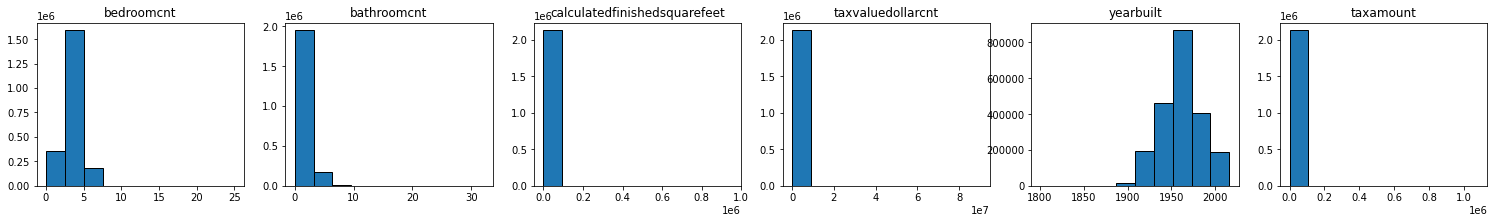

In [16]:
# bar charts
plt.figure(figsize=(26, 3))

# List of columns
cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,6, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

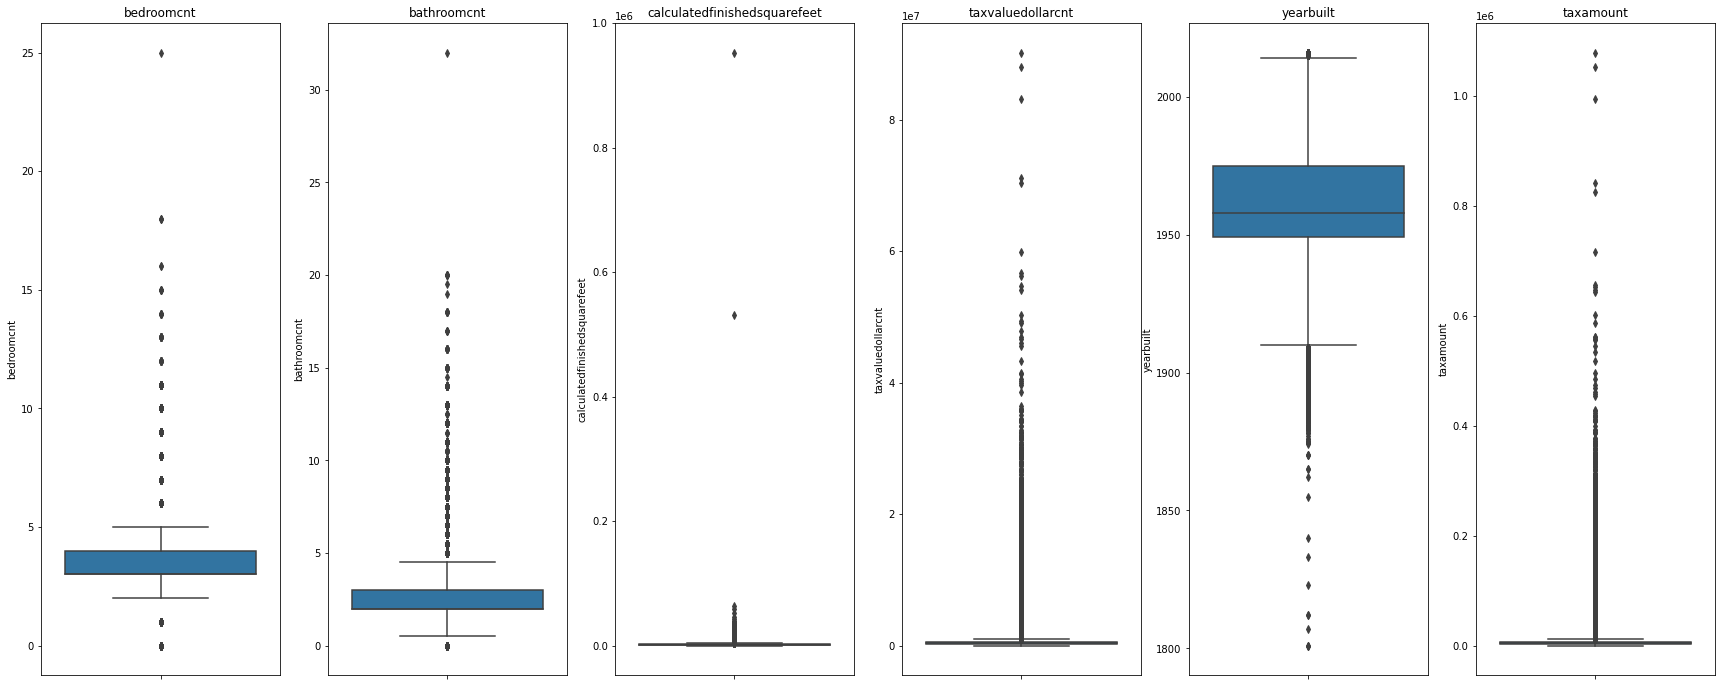

In [17]:
# boxplots
plt.figure(figsize=(30, 12))

# List of columns
num_cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(num_cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,6, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display boxplot for column.
    sns.boxplot(y=col, data=df)

**Takeaways**
- There are a lot of outliers in this dataset
    - I will drop anything outside of the whiskers of these boxplots (Q1 – 1.5*IQR and Q3 + 1.5*IQR)

Create a for loop that drops all data points outside whiskers for all numerical columns

In [18]:
df.shape

(2130214, 7)

In [19]:
# Q1
Q1 = np.percentile(df.bedroomcnt, 25, interpolation='midpoint')
Q1

3.0

In [20]:
Q1, Q3 = np.percentile(df.bedroomcnt, [25, 75], interpolation='midpoint')

In [21]:
Q1

3.0

In [22]:
Q3

4.0

In [23]:
# Q3
Q3 = np.percentile(df.bedroomcnt, 75, interpolation='midpoint')
Q3

4.0

In [24]:
# IQR
IQR = Q3 - Q1
IQR

1.0

In [25]:
# upper bound
UB = Q3 + 1.5 * IQR
UB

5.5

In [26]:
# lower bound
LB = Q1 - 1.5 * IQR
LB

1.5

In [27]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [28]:
num_cols = df.select_dtypes('number').columns.tolist()
num_cols

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount']

In [29]:
# put together into a for loop
for col in num_cols:
    Q1 = np.percentile(df[col], 25, interpolation='midpoint')
    Q3 = np.percentile(df[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    UB = Q3 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    df = df[(df[col] < UB) & (df[col] > LB)]

In [30]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [31]:
df.shape

(1790213, 7)

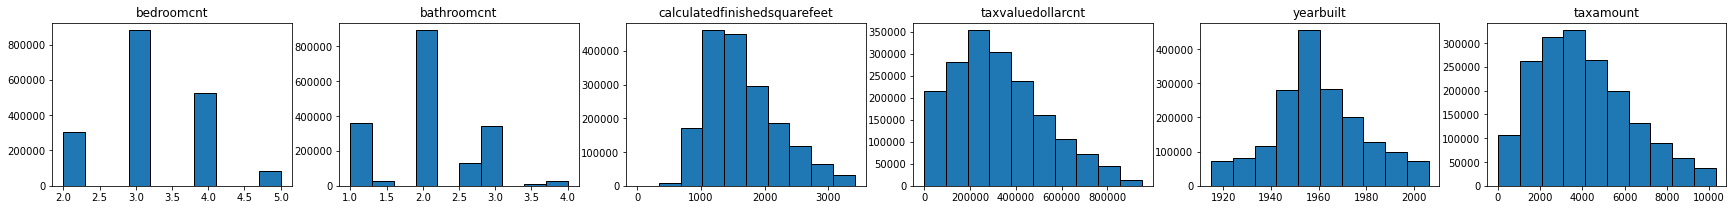

In [32]:
# bar charts
plt.figure(figsize=(30, 3))

# List of columns
cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,6, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

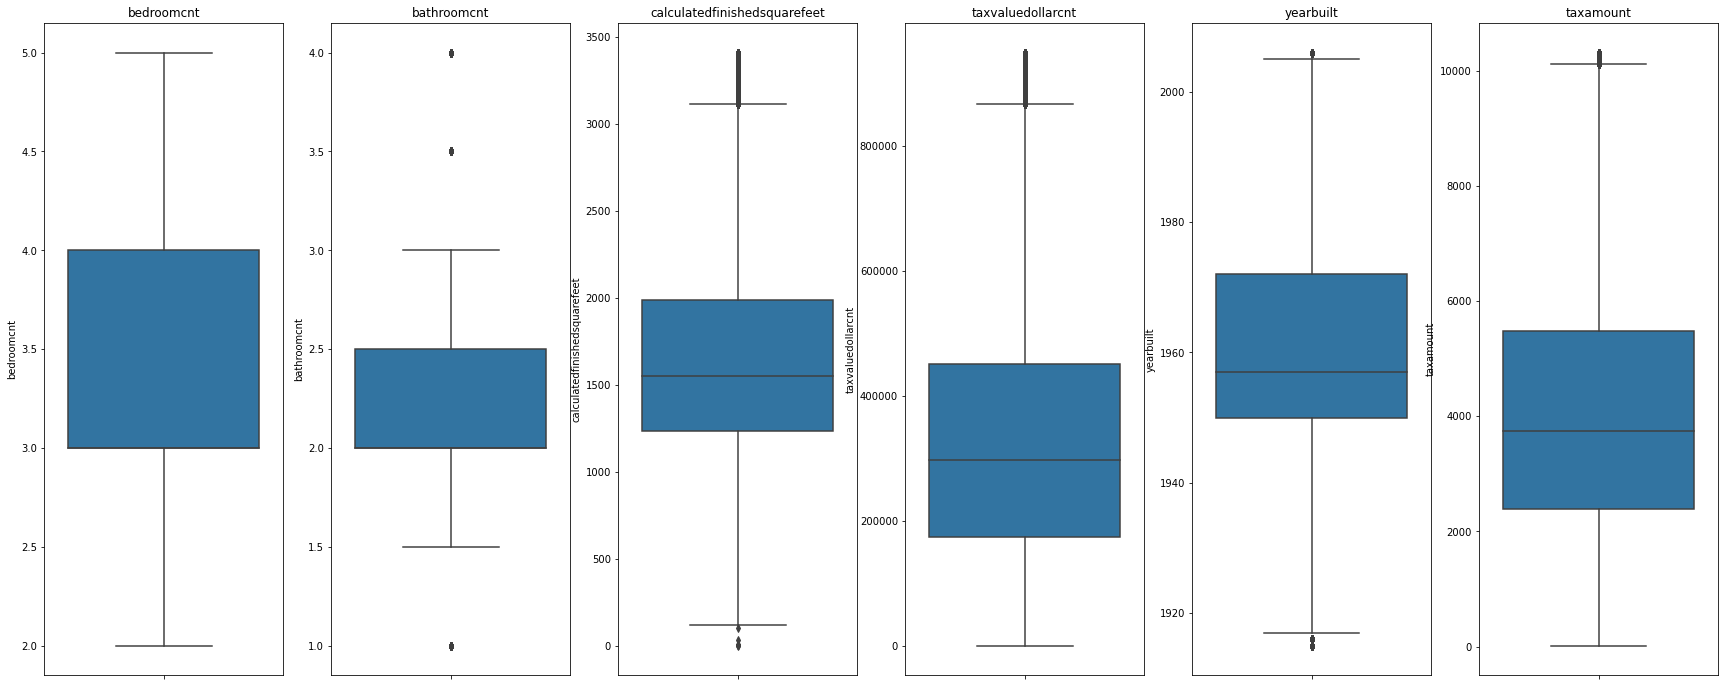

In [33]:
# boxplots
plt.figure(figsize=(30, 12))

# List of columns
num_cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(num_cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,6, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display boxplot for column.
    sns.boxplot(y=col, data=df)

***Looks much better***

In [34]:
df.shape

(1790213, 7)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790213 entries, 7 to 2152853
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          string 
dtypes: float64(6), string(1)
memory usage: 109.3 MB


In [36]:
# change dtypes for columns where needed
df.bedroomcnt.value_counts()

3.0    879491
4.0    522716
2.0    301940
5.0     86066
Name: bedroomcnt, dtype: int64

In [37]:
df.bedroomcnt = df.bedroomcnt.astype('int')

In [38]:
df.bathroomcnt.value_counts()

2.00    891382
1.00    358365
3.00    341091
2.50    128457
4.00     29810
1.50     29648
3.50     11457
1.75         3
Name: bathroomcnt, dtype: int64

In [39]:
df.calculatedfinishedsquarefeet.value_counts()

1200.0    4879
1080.0    4114
1120.0    4072
1400.0    3676
1440.0    3505
          ... 
206.0        1
473.0        1
315.0        1
417.0        1
425.0        1
Name: calculatedfinishedsquarefeet, Length: 3008, dtype: int64

In [40]:
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype('int')

In [41]:
df.yearbuilt.value_counts()

1955.0    79961
1950.0    66703
1954.0    65231
1953.0    58543
1956.0    57772
          ...  
1933.0     1996
1916.0     1785
1934.0     1752
1918.0     1524
1917.0     1288
Name: yearbuilt, Length: 92, dtype: int64

In [42]:
df.yearbuilt = df.yearbuilt.astype('int')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790213 entries, 7 to 2152853
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          string 
dtypes: float64(3), int64(3), string(1)
memory usage: 109.3 MB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,1790213.0,3.219476,0.777677,2.00,3.00,3.00,4.00,5.00
bathroomcnt,1790213.0,2.060850,0.700067,1.00,2.00,2.00,2.50,4.00
calculatedfinishedsquarefeet,1790213.0,1653.936424,562.324467,1.00,1233.00,1549.00,1986.00,3411.00
taxvaluedollarcnt,1790213.0,328083.383491,197680.334657,22.00,174787.00,297524.00,451861.00,949902.00
yearbuilt,1790213.0,1960.050468,18.847503,1915.00,1950.00,1957.00,1972.00,2006.00
taxamount,1790213.0,4066.981068,2222.595896,16.48,2380.97,3751.28,5474.88,10314.08


### 3.

Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.

In [45]:
def wrangle_zillow():
    df = w.get_zillow_sfr_data()
    df = df.dropna()
    df = df.drop_duplicates()
    df.fips = '0' + df.fips.astype('int').astype('string')
    df.bedroomcnt = df.bedroomcnt.astype('int')
    df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype('int')
    df.yearbuilt = df.yearbuilt.astype('int')
    num_cols = df.select_dtypes('number').columns.tolist()
    for col in num_cols:
        Q1 = np.percentile(df[col], 25, interpolation='midpoint')
        Q3 = np.percentile(df[col], 75, interpolation='midpoint')
        IQR = Q3 - Q1
        UB = Q3 + (1.5 * IQR)
        LB = Q1 - (1.5 * IQR)
        df = df[(df[col] < UB) & (df[col] > LB)]
    return df

In [46]:
df = wrangle_zillow()

In [47]:
df.shape

(1790213, 7)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790213 entries, 7 to 2152853
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          string 
dtypes: float64(3), int64(3), string(1)
memory usage: 109.3 MB


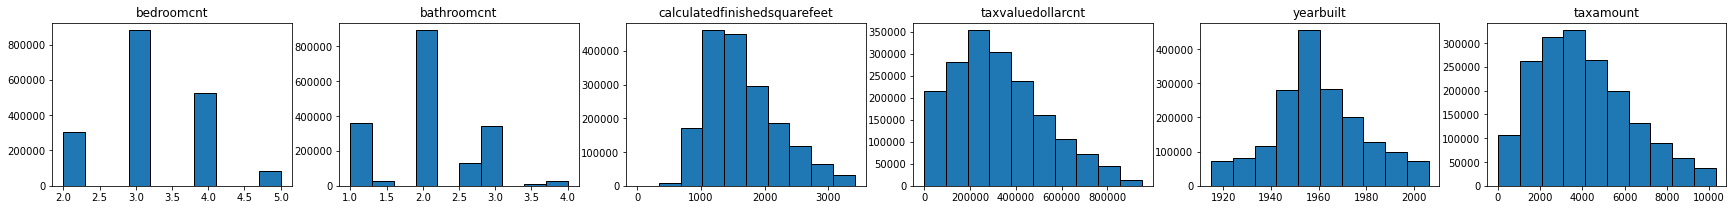

In [49]:
# bar charts
plt.figure(figsize=(30, 3))

# List of columns
cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,6, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

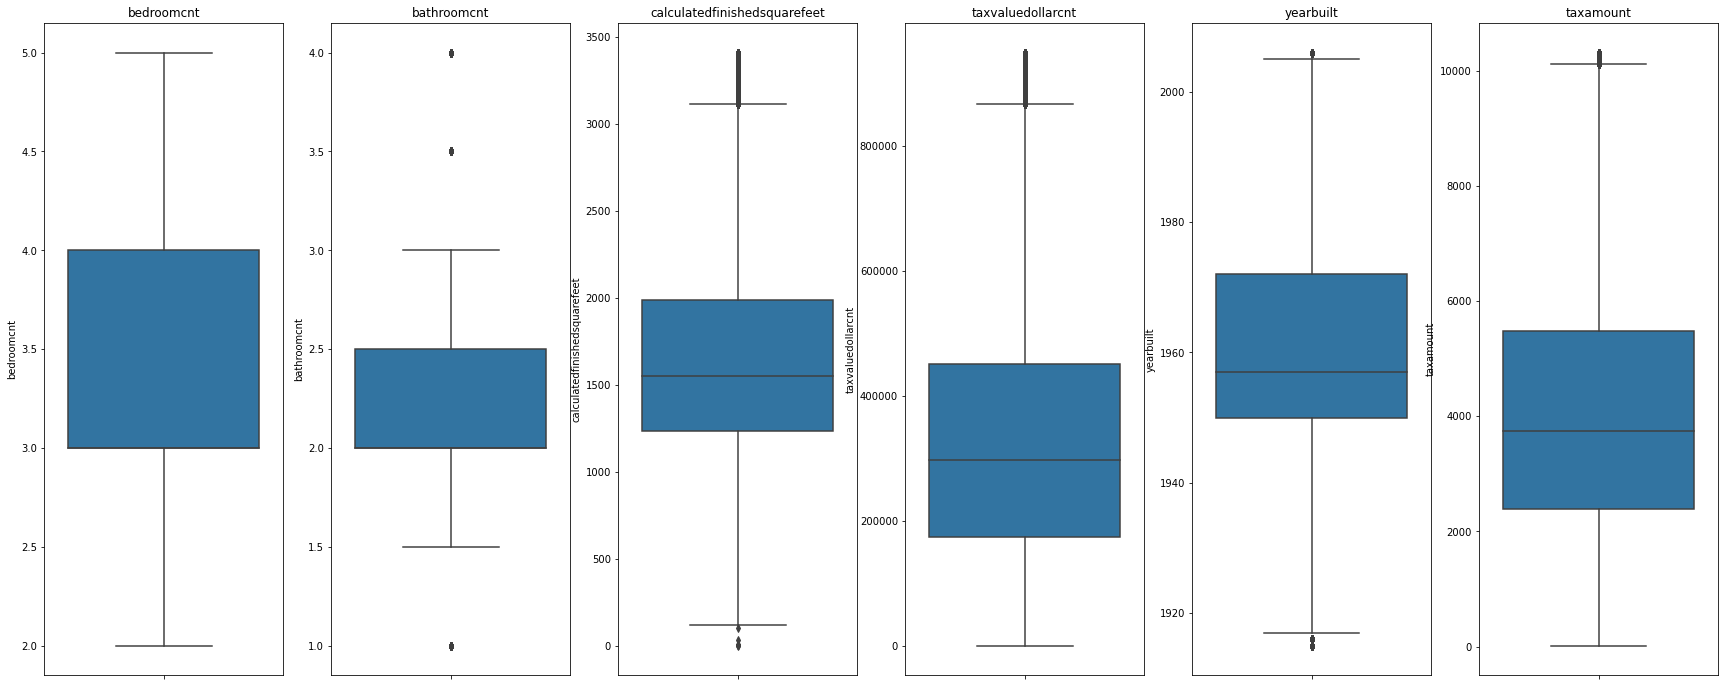

In [50]:
# boxplots
plt.figure(figsize=(30, 12))

# List of columns
num_cols = df.select_dtypes('number').columns.tolist()

for i, col in enumerate(num_cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,6, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display boxplot for column.
    sns.boxplot(y=col, data=df)

In [51]:
# split data

def split_zillow(df):
    '''
    This function takes in a df and splits it into train, validate, and test dfs
    final proportions will be 80/10/10 for train/validate/test
    '''
    train_validate, test = train_test_split(df, test_size=0.10, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.11, random_state=123)
    return train, validate, test

In [52]:
train, validate, test = split_zillow(df)

In [53]:
# check proportions of splits
print(f'Proportion of train: {train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.80
Proportion of validate: 0.10
Proportion of test: 0.10


In [54]:
def wrangle_zillow():
    '''
    This function aquires, prepares, and splits zillow data
    '''
    df = w.get_zillow_sfr_data()
    df = df.dropna()
    df = df.drop_duplicates()
    df.fips = '0' + df.fips.astype('int').astype('string')
    df.bedroomcnt = df.bedroomcnt.astype('int')
    df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.astype('int')
    df.yearbuilt = df.yearbuilt.astype('int')
    num_cols = df.select_dtypes('number').columns.tolist()
    for col in num_cols:
        Q1 = np.percentile(df[col], 25, interpolation='midpoint')
        Q3 = np.percentile(df[col], 75, interpolation='midpoint')
        IQR = Q3 - Q1
        UB = Q3 + (1.5 * IQR)
        LB = Q1 - (1.5 * IQR)
        df = df[(df[col] < UB) & (df[col] > LB)]
    train, validate, test = split_zillow(df)
    return train, validate, test

In [55]:
train, validate, test = wrangle_zillow()

In [56]:
# check proportions of splits
print(f'Proportion of train: {train.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of validate: {validate.shape[0]/df.shape[0]:.2f}')
print(f'Proportion of test: {test.shape[0]/df.shape[0]:.2f}')

Proportion of train: 0.80
Proportion of validate: 0.10
Proportion of test: 0.10


---

In [57]:
# John's function to remove outliers
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df